<a href="https://colab.research.google.com/github/v5v5/trading/blob/main/trade_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

URL to download quotes EURUSD

https://query1.finance.yahoo.com/v7/finance/download/EURUSD=X?period1=1262304000&period2=1619654400&interval=1d&events=history&includeAdjustedClose=true

In [267]:
import pandas as pd
from urllib.request import Request, urlopen
from io import StringIO
import datetime
from dateutil.relativedelta import relativedelta
import time
import random
import math
import matplotlib.pyplot as plt

In [268]:
# dt_from = datetime.date(2000,1,1)
# dt_from = datetime.date(2019,1,1)
# dt_from = datetime.date.today() + relativedelta(years=-1)
dt_from = datetime.date.today() + relativedelta(years=-2)
ut_from = str(int(time.mktime(dt_from.timetuple())))
ut_from

'1557964800'

In [269]:
dt_to = datetime.date.today()
ut_to = str(int(time.mktime(dt_to.timetuple())))
ut_to

'1621123200'

In [270]:
# url='https://query1.finance.yahoo.com/v7/finance/download/EURUSD=X?period1=1262304000&period2=1619654400&interval=1d&events=history&includeAdjustedClose=true'
url='https://query1.finance.yahoo.com/v7/finance/download/EURUSD=X?period1=' + ut_from + '&period2=' + ut_to + '&interval=1d&events=history&includeAdjustedClose=true'

In [271]:
headers={'User-Agent': 'Mozilla/5.0'}

In [272]:
req = Request(url, headers=headers)

In [273]:
page = urlopen(req)
# page = urlopen(url)

In [274]:
page = urlopen(url)

In [275]:
content = page.read()

In [276]:
text = content.decode('UTF-8')

In [277]:
print(text[:300])

Date,Open,High,Low,Close,Adj Close,Volume
2019-05-16,1.120951,1.122435,1.117431,1.120724,1.120724,0
2019-05-17,1.117481,1.118443,1.115735,1.117356,1.117356,0
2019-05-20,1.116532,1.117701,1.115126,1.116532,1.116532,0
2019-05-21,1.116944,1.118318,1.114243,1.116857,1.116857,0
2019-05-22,null,null,null,


In [278]:
data = StringIO(text)

In [279]:
df1 = pd.read_csv(data, sep=',', header='infer')

In [280]:
df1.tail(7)

,Date,Open,High,Low,Close,Adj Close,Volume
515,2021-05-06,1.200913,1.207001,1.199400,1.200797,1.200797,0.0
516,2021-05-07,1.206593,1.216545,1.205342,1.206855,1.206855,0.0
517,2021-05-10,1.216752,1.217730,1.213740,1.217108,1.217108,0.0
518,2021-05-11,1.214211,1.217968,1.212547,1.214093,1.214093,0.0
519,2021-05-12,1.214550,1.215067,1.206811,1.214450,1.214450,0.0
520,2021-05-13,1.207686,1.210654,1.205313,1.207851,1.207851,0.0
521,2021-05-14,1.208021,1.214772,1.207146,1.207729,1.207729,0.0


In [281]:
# df1[df1['Open'].isna()]
len(df1[df1['Open'].isna()].index)

21

In [282]:
df1.sort_values(by=['Date'], inplace=True)

In [283]:
df1.dropna(inplace=True)
df1.reset_index(inplace=True)
df1

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2019-05-16,1.120951,1.122435,1.117431,1.120724,1.120724,0.0
1,1,2019-05-17,1.117481,1.118443,1.115735,1.117356,1.117356,0.0
2,2,2019-05-20,1.116532,1.117701,1.115126,1.116532,1.116532,0.0
3,3,2019-05-21,1.116944,1.118318,1.114243,1.116857,1.116857,0.0
4,5,2019-05-23,1.115511,1.117281,1.110951,1.115548,1.115548,0.0
...,...,...,...,...,...,...,...,...
496,517,2021-05-10,1.216752,1.217730,1.213740,1.217108,1.217108,0.0
497,518,2021-05-11,1.214211,1.217968,1.212547,1.214093,1.214093,0.0
498,519,2021-05-12,1.214550,1.215067,1.206811,1.214450,1.214450,0.0
499,520,2021-05-13,1.207686,1.210654,1.205313,1.207851,1.207851,0.0


In [284]:
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')

In [285]:
df1['DayOfWeek'] = df1['Date'].dt.dayofweek

In [286]:
df1.tail(7)

,index,Date,Open,High,Low,Close,Adj Close,Volume,DayOfWeek
494,515,2021-05-06,1.200913,1.207001,1.199400,1.200797,1.200797,0.0,3
495,516,2021-05-07,1.206593,1.216545,1.205342,1.206855,1.206855,0.0,4
496,517,2021-05-10,1.216752,1.217730,1.213740,1.217108,1.217108,0.0,0
497,518,2021-05-11,1.214211,1.217968,1.212547,1.214093,1.214093,0.0,1
498,519,2021-05-12,1.214550,1.215067,1.206811,1.214450,1.214450,0.0,2
499,520,2021-05-13,1.207686,1.210654,1.205313,1.207851,1.207851,0.0,3
500,521,2021-05-14,1.208021,1.214772,1.207146,1.207729,1.207729,0.0,4


In [287]:
df2 = df1.drop(['High','Low', 'Adj Close', 'Volume'], axis=1)

In [288]:
df2.tail(7)

,index,Date,Open,Close,DayOfWeek
494,515,2021-05-06,1.200913,1.200797,3
495,516,2021-05-07,1.206593,1.206855,4
496,517,2021-05-10,1.216752,1.217108,0
497,518,2021-05-11,1.214211,1.214093,1
498,519,2021-05-12,1.214550,1.214450,2
499,520,2021-05-13,1.207686,1.207851,3
500,521,2021-05-14,1.208021,1.207729,4


In [289]:
df2['Close-1'] = df2['Close'].shift(1)
df2['Open-1'] = df2['Open'].shift(1)

In [290]:
df2.tail(7)

,index,Date,Open,Close,DayOfWeek,Close-1,Open-1
494,515,2021-05-06,1.200913,1.200797,3,1.201504,1.201634
495,516,2021-05-07,1.206593,1.206855,4,1.200797,1.200913
496,517,2021-05-10,1.216752,1.217108,0,1.206855,1.206593
497,518,2021-05-11,1.214211,1.214093,1,1.217108,1.216752
498,519,2021-05-12,1.214550,1.214450,2,1.214093,1.214211
499,520,2021-05-13,1.207686,1.207851,3,1.214450,1.214550
500,521,2021-05-14,1.208021,1.207729,4,1.207851,1.207686


In [291]:
df2['%Close'] = (df2['Close'] - df2['Close-1']) / df2['Close-1'] * 100
df2['%Open'] = (df2['Open'] - df2['Open-1']) / df2['Open-1'] * 100

In [292]:
df2 = df2.drop(['Close','Close-1', '%Close'], axis=1)

In [293]:
df2.head(7)

,index,Date,Open,DayOfWeek,Open-1,%Open
0,0,2019-05-16,1.120951,3,NaN,NaN
1,1,2019-05-17,1.117481,4,1.120951,-0.309559
2,2,2019-05-20,1.116532,0,1.117481,-0.084923
3,3,2019-05-21,1.116944,1,1.116532,0.036900
4,5,2019-05-23,1.115511,3,1.116944,-0.128296
5,6,2019-05-24,1.118381,4,1.115511,0.257281
6,7,2019-05-27,1.120636,0,1.118381,0.201631


In [294]:
# take decision to buy or sell - if price = 1.167072 then buy = -1.167072 or sell = 1.167072
def take_decision(index):
  row = df2.loc[index]
  return random.choice([-row['Open'], +row['Open']])

In [295]:
def is_guessed(index):
  if (index < 1):
    return True
  return (math.copysign(1, df2.loc[index]['%Open']) != math.copysign(1, df2.loc[index - 1]['decision']))

In [296]:
def make_deal(index):
  k = df2.loc[index, 'k'] 
  decision = df2.loc[index, 'decision'] 
  return decision * (2 ** k)

In [297]:
def discover_trend(index):
  if (index < 1):
    df2.loc[index, 'trend'] = 0
    return
  open_curr = df2.loc[index, '%Open']
  open_prev = df2.loc[index-1, '%Open']
  if (math.copysign(1, open_prev) == math.copysign(1, open_curr)):
    df2.loc[index, 'trend'] = df2.loc[index-1, 'trend'] + 1
  else:
    df2.loc[index, 'trend'] = 0

In [298]:
# this is a main algorithm for trading
def trade():
  for index, row in df2.iterrows():
    # close previous deal
    if index < 1:
      df2.loc[index, 'result after close'] = 0
    else:
      # TODO incorrect algorithm
      df2.loc[index, 'result after close'] = df2.loc[index - 1, 'result after close'] + \
        df2.loc[index - 1, 'deal'] + \
        (2 ** df2.loc[index - 1, 'k']) * df2.loc[index, 'Open'] * math.copysign(1, df2.loc[index - 1]['deal'])

    # coefficient of deal depends on result of previous deal
    if (is_guessed(index)):
      k = 0
    else:
      k += 1
    df2.loc[index, 'k'] = k

    # take decision
    df2.loc[index, 'decision'] = take_decision(index)

    # make deal
    df2.loc[index, 'deal'] = make_deal(index)

    # open new deal
    if (index < 1):
      df2.loc[index, 'result'] = 0
    else:
      df2.loc[index, 'result'] = df2.loc[index, 'result after close'] + df2.loc[index, 'deal']
    
    # определяем тренд
    discover_trend(index)

In [299]:
trade()

In [300]:
df2.tail(30)

,index,Date,Open,DayOfWeek,Open-1,%Open,result after close,k,decision,deal,result,trend
471,492,2021-04-05,1.176637,0,1.177773,-0.096453,-874.306495,2.0,1.176637,4.706548,-869.599947,0.0
472,493,2021-04-06,1.181907,1,1.176637,0.447887,-864.872319,3.0,1.181907,9.455256,-855.417063,0.0
473,494,2021-04-07,1.187550,2,1.181907,0.477449,-845.916663,4.0,-1.187550,-19.000800,-864.917463,1.0
474,495,2021-04-08,1.187197,3,1.187550,-0.029725,-883.912615,5.0,-1.187197,-37.990304,-921.902919,0.0
475,496,2021-04-09,1.191568,4,1.187197,0.368178,-960.033095,0.0,1.191568,1.191568,-958.841527,0.0
476,497,2021-04-12,1.189641,0,1.191568,-0.161720,-957.651886,0.0,-1.189641,-1.189641,-958.841527,0.0
477,498,2021-04-13,1.191214,1,1.189641,0.132225,-960.032741,0.0,-1.191214,-1.191214,-961.223955,0.0
478,499,2021-04-14,1.195743,2,1.191214,0.380200,-962.419698,0.0,-1.195743,-1.195743,-963.615441,1.0
479,500,2021-04-15,1.198236,3,1.195743,0.208490,-964.813677,0.0,1.198236,1.198236,-963.615441,2.0
480,501,2021-04-16,1.197074,4,1.198236,-0.096976,-962.418367,0.0,-1.197074,-1.197074,-963.615441,0.0


In [301]:
df2.describe()

,index,Open,DayOfWeek,Open-1,%Open,result after close,k,decision,deal,result,trend
count,501.000000,501.000000,501.000000,500.000000,500.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,267.676647,1.145884,2.003992,1.145760,0.015799,-330.618547,1.221557,0.020684,-0.956228,-331.572537,1.057884
std,149.688233,0.044914,1.418444,0.044873,0.409308,713.965825,1.709039,1.147721,91.086693,708.328957,1.385151
min,0.000000,1.065848,0.000000,1.065848,-2.603845,-1623.025943,0.000000,-1.226873,-1241.227264,-1033.986625,0.000000
25%,146.000000,1.108906,1.000000,1.108826,-0.239276,-957.340436,0.000000,-1.126126,-2.211068,-955.798151,0.000000
50%,271.000000,1.127714,2.000000,1.127631,0.017797,-811.446094,1.000000,1.078772,1.080684,-812.623326,1.000000
75%,396.000000,1.186437,3.000000,1.186088,0.265484,75.463596,2.000000,1.130876,2.203372,76.482282,2.000000
max,521.000000,1.233776,4.000000,1.233776,1.456985,1683.230777,10.000000,1.233776,1208.230912,1062.617145,7.000000


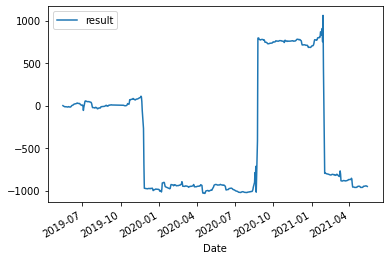

In [302]:
df2.plot('Date', 'result')

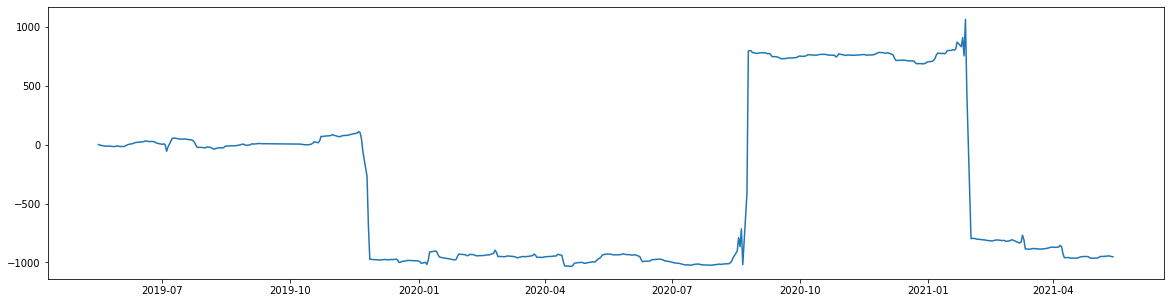

In [303]:
plt.figure(figsize=(20,5))
plt.plot(df2['Date'], df2['result'])

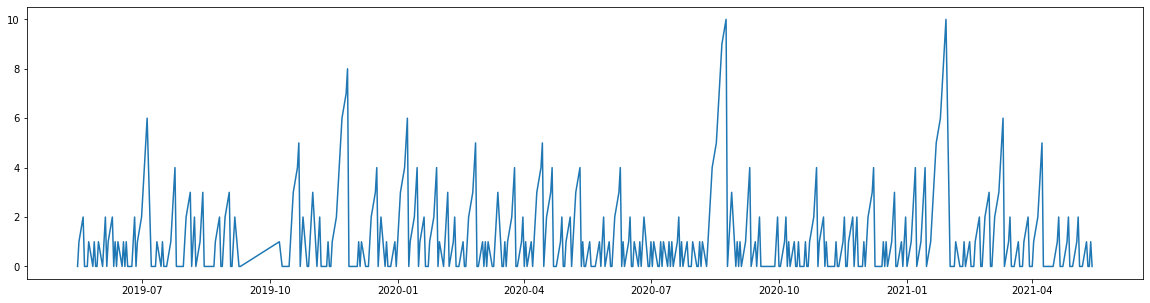

In [304]:
plt.figure(figsize=(20,5))
plt.plot(df2['Date'], df2['k'])